<a href="https://colab.research.google.com/github/satyaabdul/Deep-Learning/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

**Image Classification**


1.   **RNN**
2.   **LSTM**
3.   **GRU** 
4.   **Bidirectional LSTM**




---
## **Persiapan Data**


In [35]:
# !pip install tensorflow

import tensorflow as tf
print(tf.__version__)
# %tensorflow_version 2.x

2.0.0-rc1


In [36]:
#data yang digunakan cifar10
#klasifikasi gambar dengan 10 kelas
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ubah class vectors ke binary vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#print train dan test shape
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


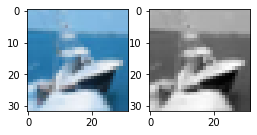

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [37]:
import matplotlib.pyplot as plt
import numpy as np

def grayscale(data, dtype='float32'):
    # convert RGB ke luma grayscale
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # dimensi channel
    rst = np.expand_dims(rst, axis=3)
    return rst

#definisikan x train dan test yang sudah di ubah menjadi grayscale
x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

# deskripsikan chanelnya cuma 1
img_channels = 1

# coba plot gambar indeks ke-
img = 8
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(x_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(x_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()
#kelas gambar
#1)airplane 2)automobile 3)bird 4)cat 5)deer 6)dog 7)frog 8)horse 9)ship 10)truck
print(y_train[img])

In [38]:
from sklearn.model_selection import train_test_split

#split data ke data train menjadi data train dan validasi  dari x_train_gray
x_train_gray, x_val_gray, y_train, y_val = train_test_split(x_train_gray, y_train, test_size=0.2, random_state=0)

#print ukuran 
print('x_train_gray shape:', x_train_gray.shape)
print('x_val_gray shape:', x_val_gray.shape)

x_train_gray shape: (40000, 32, 32, 1)
x_val_gray shape: (10000, 32, 32, 1)




---

## **Deep Learning - RNN**



In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Flatten,Embedding

#proses sequential
model_RNN = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_RNN.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_RNN.add(Embedding(10000, 32))
#gunakan RNN dengan 32 neuron/memory
model_RNN.add(SimpleRNN(32))
#hiden layers dengan 64 neuron/memory
model_RNN.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_RNN.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_RNN.add(Dense(10,activation='softmax'))
#compile model
model_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history RNN
hist_RNN = model_RNN.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_RNN.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 114s 3ms/sample - loss: 2.3007 - accuracy: 0.1045 - val_loss: 2.2938 - val_accuracy: 0.1137
Epoch 2/6
40000/40000 [==============================] - 108s 3ms/sample - loss: 2.2827 - accuracy: 0.1321 - val_loss: 2.2839 - val_accuracy: 0.1316
Epoch 3/6
40000/40000 [==============================] - 108s 3ms/sample - loss: 2.2677 - accuracy: 0.1465 - val_loss: 2.2877 - val_accuracy: 0.1338
Epoch 4/6
40000/40000 [==============================] - 109s 3ms/sample - loss: 2.2718 - accuracy: 0.1409 - val_loss: 2.2990 - val_accuracy: 0.1141
Epoch 5/6
40000/40000 [==============================] - 111s 3ms/sample - loss: 2.2609 - accuracy: 0.1520 - val_loss: 2.2971 - val_accuracy: 0.1317
Epoch 6/6
40000/40000 [==============================] - 118s 3ms/sample - loss: 2.2347 - accuracy: 0.1681 - val_loss: 2.2790 - val_accuracy: 0.1390


In [10]:
#print akurasi dan loss RNN
loss_RNN, acc_RNN = model_RNN.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

Accuracy: 13.62 %
Loss: 227.66 %




---
## **Deep Learning - LSTM**


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten,Embedding

#proses sequential
model_LSTM = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_LSTM.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_LSTM.add(Embedding(10000, 32))
#gunakan LSTM dengan 32 neuron/memory
model_LSTM.add(LSTM(32))
#hiden layers dengan 64 neuron/memory
model_LSTM.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_LSTM.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_LSTM.add(Dense(10,activation='softmax'))
#compile model
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history LSTM
hist_LSTM = model_LSTM.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_LSTM.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 206s 5ms/sample - loss: 2.2859 - accuracy: 0.1252 - val_loss: 2.2669 - val_accuracy: 0.1352
Epoch 2/6
40000/40000 [==============================] - 223s 6ms/sample - loss: 2.2832 - accuracy: 0.1330 - val_loss: 2.2808 - val_accuracy: 0.1394
Epoch 3/6
40000/40000 [==============================] - 198s 5ms/sample - loss: 2.2764 - accuracy: 0.1408 - val_loss: 2.2718 - val_accuracy: 0.1462
Epoch 4/6
40000/40000 [==============================] - 208s 5ms/sample - loss: 2.2630 - accuracy: 0.1532 - val_loss: 2.2622 - val_accuracy: 0.1543
Epoch 5/6
40000/40000 [==============================] - 199s 5ms/sample - loss: 2.2644 - accuracy: 0.1489 - val_loss: 2.2813 - val_accuracy: 0.1394
Epoch 6/6
40000/40000 [==============================] - 206s 5ms/sample - loss: 2.2634 - accuracy: 0.1543 - val_loss: 2.2926 - val_accuracy: 0.1408


In [13]:
#print akurasi dan loss LSTM
loss_LSTM, acc_LSTM = model_LSTM.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_LSTM*100), "%")
print("Loss: %.2f" % (loss_LSTM*100), "%")

Accuracy: 13.79 %
Loss: 229.34 %




---

## **Deep Learning - GRU**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense,Flatten,Embedding

#proses sequential
model_GRU = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_GRU.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_GRU.add(Embedding(10000, 32))
#gunakan GRU dengan 32 neuron/memory
model_GRU.add(GRU(32))
#hiden layers dengan 64 neuron/memory
model_GRU.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_GRU.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_GRU.add(Dense(10,activation='softmax'))
#compile model
model_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history LSTM
hist_GRU = model_GRU.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_LSTM.summary()

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 217s 4ms/sample - loss: 2.2863 - accuracy: 0.1294 - val_loss: 2.2443 - val_accuracy: 0.1487
Epoch 2/6
50000/50000 [==============================] - 216s 4ms/sample - loss: 2.1817 - accuracy: 0.1764 - val_loss: 2.1423 - val_accuracy: 0.1892
Epoch 3/6
50000/50000 [==============================] - 215s 4ms/sample - loss: 2.1279 - accuracy: 0.1990 - val_loss: 2.1026 - val_accuracy: 0.2087
Epoch 4/6
50000/50000 [==============================] - 220s 4ms/sample - loss: 2.0937 - accuracy: 0.2174 - val_loss: 2.0699 - val_accuracy: 0.2264
Epoch 5/6
50000/50000 [==============================] - 228s 5ms/sample - loss: 2.0460 - accuracy: 0.2365 - val_loss: 1.9873 - val_accuracy: 0.2572
Epoch 6/6
50000/50000 [==============================] - 214s 4ms/sample - loss: 1.9496 - accuracy: 0.2696 - val_loss: 1.9012 - val_accuracy: 0.2869


In [ ]:
#print akurasi dan loss GRU
loss_GRU, acc_GRU = model_GRU.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_GRU*100), "%")
print("Loss: %.2f" % (loss_GRU*100), "%")



---
## **Deep Learning - Bidirectional LSTM**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM,Dense,Flatten,Embedding

#proses sequential
model_BLSTM = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_BLSTM.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_BLSTM.add(Embedding(10000, 32))
#gunakan Bidirectinal LSTM dengan 32 neuron/memory
model_BLSTM.add(Bidirectional(LSTM(32)))
#hiden layers dengan 64 neuron/memory
model_BLSTM.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_BLSTM.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_BLSTM.add(Dense(10,activation='softmax'))
#compile model
model_BLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history BLSTM
hist_BLSTM = model_BLSTM.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_BLSTM.summary()

In [ ]:
#print akurasi dan loss BLSTM
loss_BLSTM, acc_BLSTM = model_BLSTM.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_BLSTM*100), "%")
print("Loss: %.2f" % (loss_BLSTM*100), "%")